In [1]:
!git clone https://github.com/hpcaitech/ColossalAI.git

Cloning into 'ColossalAI'...
remote: Enumerating objects: 41584, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 41584 (delta 35), reused 33 (delta 25), pack-reused 41534
Receiving objects: 100% (41584/41584), 29.67 MiB | 24.78 MiB/s, done.
Resolving deltas: 100% (28317/28317), done.


In [3]:
cd ColossalAI

/content/ColossalAI


In [4]:
!pip install .

Processing /content/ColossalAI
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 11.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-

In [1]:
cd /content/ColossalAI/examples/images/resnet

/content/ColossalAI/examples/images/resnet


In [6]:
!colossalai run --nproc_per_node 1 train.py -c ./ckpt-fp32

/usr/local/lib/python3.10/dist-packages/colossalai/pipeline/schedule/_utils.py:19: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _register_pytree_node(OrderedDict, _odict_flatten, _odict_unflatten)
/usr/local/lib/python3.10/dist-packages/torch/utils/_pytree.py:254: UserWarning: <class 'collections.OrderedDict'> is already registered as pytree node. Overwriting the previous registration.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/colossalai/shardformer/layer/normalization.py:45: UserWarning: Please install apex from source (https://github.com/NVIDIA/apex) to use the fused layernorm kernel
  warnings.warn("Please install apex from source (https://github.com/NVIDIA/apex) to use the fused layernorm kernel")
/usr/local/lib/python3.10/dist-packages/colossalai/initialize.py:48: UserWarning: `config` is deprecated and will be removed soon.
  warnings.warn("`config` is deprecated and will be rem

In [7]:
!python eval.py -c ./ckpt-fp32 -e 80

Accuracy of the model on the test images: 85.16 %


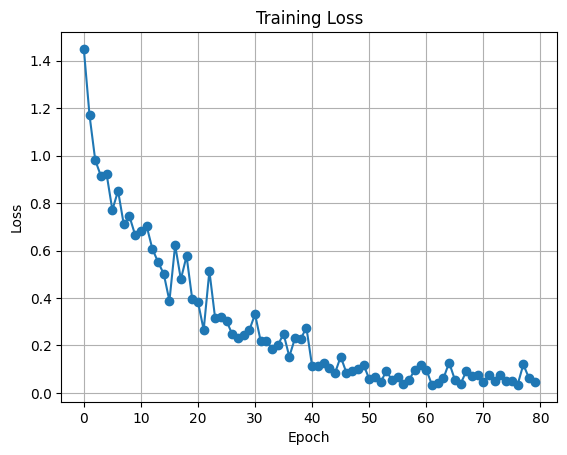

In [4]:
import matplotlib.pyplot as plt

# Read loss values from the file
with open('loss.txt', 'r') as file:
    lines = file.readlines()
    loss_values = [float(line.strip().replace(",","")) for line in lines[1:]] 

# Plot the loss values
plt.plot(loss_values, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()